In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv")

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [8]:
gdp_df.shape

(7662, 4)

In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df = gdp_df.drop('Value Footnotes',axis=1)

In [42]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [44]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
missing_countries = gdp_df.groupby('Country')['Year'].count().sort_values().reset_index()

In [15]:
print(missing_countries)

                       Country  Year
0                     Djibouti    10
1                      Somalia    10
2     Turks and Caicos Islands    12
3    Sint Maarten (Dutch part)    14
4                       Kosovo    15
..                         ...   ...
237                    Jamaica    33
238                      Japan    33
239                     Jordan    33
240                  IDA total    33
241                   Zimbabwe    33

[242 rows x 2 columns]


In [16]:
missing_countries = missing_countries.rename(columns={'Year':'count_of_year'})

In [17]:
missing_countries

,Country,count_of_year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [18]:
missing_countries[missing_countries['count_of_year']<33]['Country'].count()

40

In [19]:
missing_countries[missing_countries['count_of_year']==33]['Country'].count()

202

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [50]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]


In [52]:
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


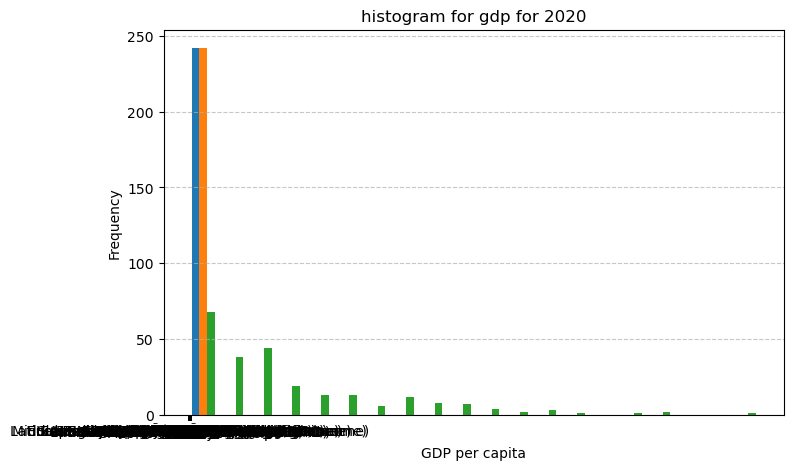

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, bins=20)
plt.title("histogram for gdp for 2020")
plt.xlabel("GDP per capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

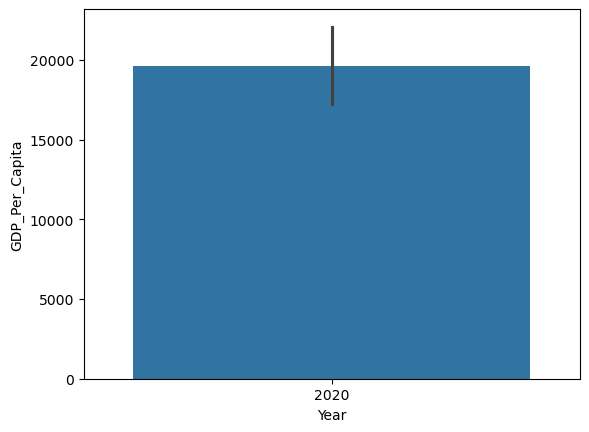

In [58]:
sns.barplot(data = gdp_2020,x='Year',y='GDP_Per_Capita')


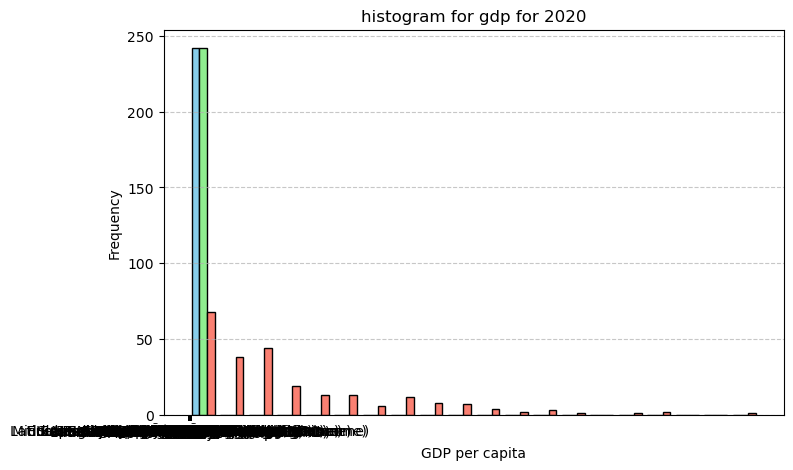

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, bins=20, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("histogram for gdp for 2020")
plt.xlabel("GDP per capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 9. What was the median GDP per capita value in 2020?

In [69]:
median_for_2020 = gdp_2020['GDP_Per_Capita'].median()

In [71]:
median_for_2020 

13357.997573370474

# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [74]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]


# 10. A boxplot 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

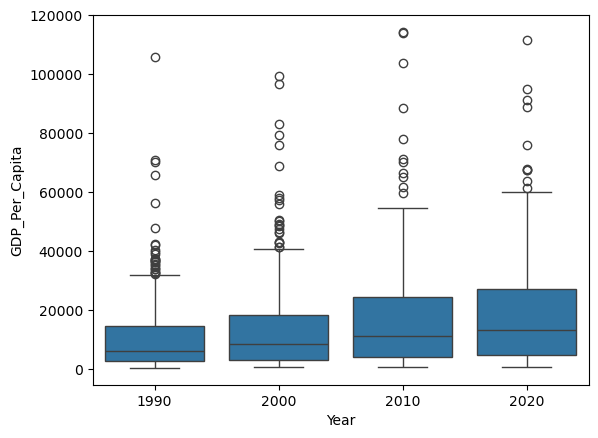

In [80]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10. A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

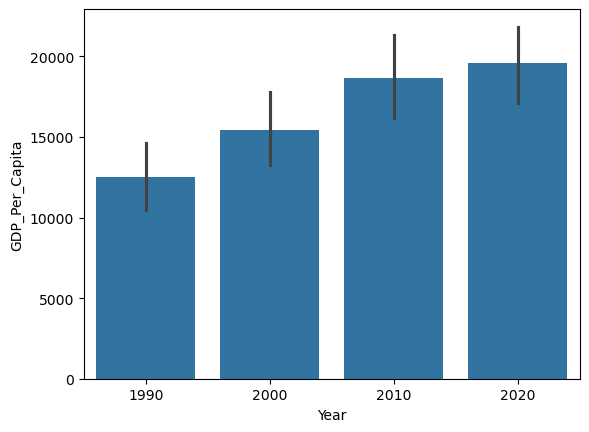

In [85]:
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10.c. A scatterplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

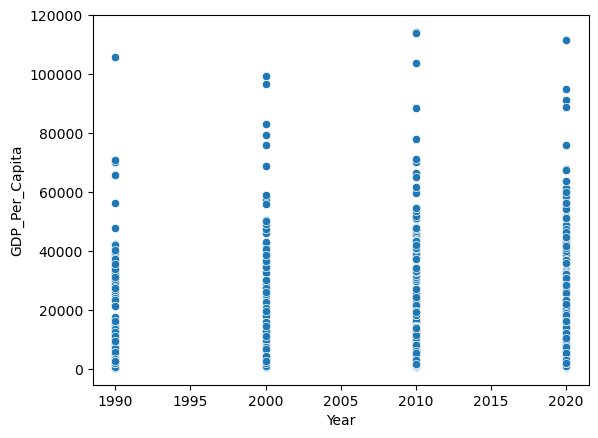

In [90]:
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

# 10. d: A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

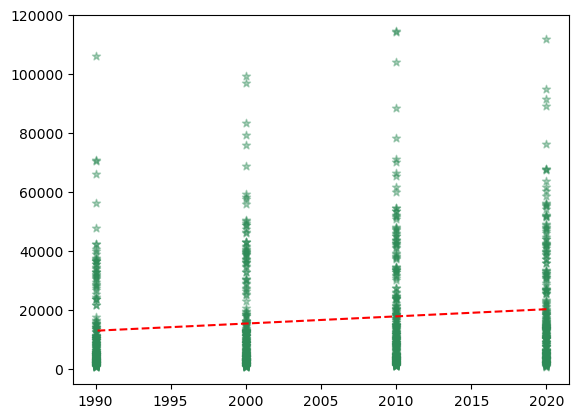

In [97]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, color = 'seagreen', marker ='*', alpha = 0.4)
trend = np.polyfit(gdp_decades.Year,gdp_decades.GDP_Per_Capita ,1)
trend_var = np.poly1d(trend)
plt.plot(gdp_decades.Year, trend_var(gdp_decades.Year),"r--")
plt.show()

# 11: Which country was the first to have a GDP per capita greater than $100,000?

In [102]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


# 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

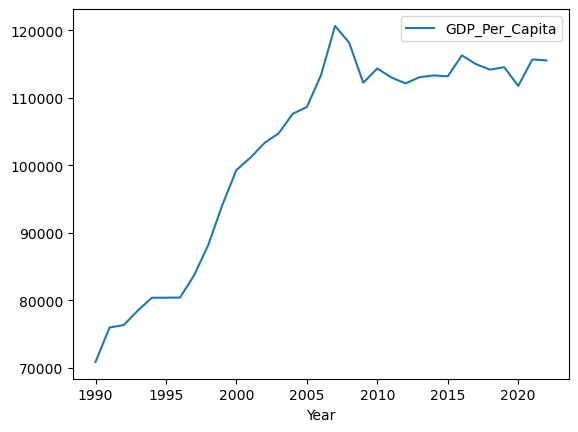

In [107]:
gdp_df[gdp_df['Year']==2020]
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')
top_country = gdp_df[gdp_df['Country']=='Luxembourg']
top_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

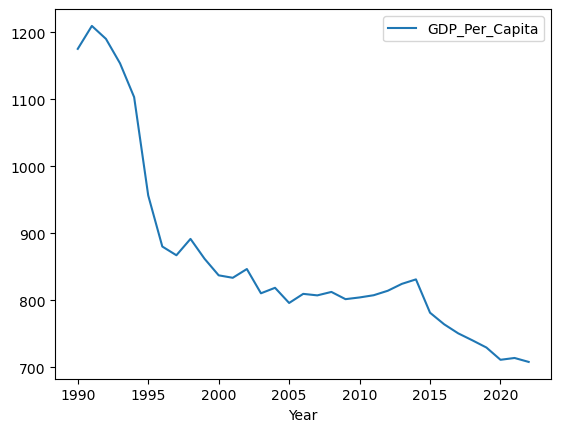

In [110]:
gdp_df[gdp_df['Year']==2020]
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')
gdp_df[gdp_df['Country']==('Burundi')]
smallest_country = gdp_df[gdp_df['Country']==('Burundi')]
smallest_country
smallest_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

# 14: Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [125]:
gdp_df = pd.read_csv("../Data/internet.use.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../Data/internet.use.csv'